# Demo showing how change in patient population can affect biomarker/classifier AUC

Michael Gensheimer

6/30/2020

## Background

In medicine, biomarkers like lab tests, or statistical models are often used to predict a binary (yes/no) clinical outcome such as death within 30 days, worsening of a disease, or admission to the hospital. A common performance metric is the area under the reciever operating characteristic curve (AUC), which generally ranges from 0.5 (no better than chance) to 1.0 (all patients experiencing the outcome have higher predictor values than all the patients without the outcome). Some recent machine learning papers have reported very high AUC values, for instance [this paper](https://www.nature.com/articles/s41586-019-1390-1) from DeepMind that uses inpatient medical record data to predict acute kidney injury (AKI) and states an AUC of 0.98 for prediction of stage 3 AKI (reported in the supplement).

It's important to consider the patient population when evaluating performance metrics like AUC. The DeepMind paper looked at all patients in the VA system who were admitted to the hospital, which would include many patients at very low risk of developing AKI such as those admitted for elective surgical procedures, and some at very high risk such as patients with septic shock. It would be easy to come up with simple criteria that could do a good job of selecting high-risk patients. This broad population makes it easier to achieve a high AUC value, as will be demonstrated below. The take-home point is that metrics like AUC are useful for comparing performance of model 1 vs. model 2 on the same dataset, but not so good at comparing model 1 on dataset 1 vs. model 2 on dataset 2.

## Simulated data example

We will use an example where the biomarker is hemoglobin A1c, and the outcome is development of a foot ulcer. Hemoglobin A1c is an indicator of the presence of diabetes and its severity. Foot ulcers develop mainly in patients with diabetes and are more common in patients with severe diabetes and high hemoglobin A1c.

We will first create a dataset with 1,000 patients with diabetes, and will assign half the patients to having the outcome of foot ulcer. Patients with higher hemoglobin A1c will have a higher risk of foot ulcer. The AUC of hemoglobin A1c for development of foot ulcer in this sample is 0.77.

Then, we will add 1,000 non-diabetic patients to the dataset, who have low hemoglobin A1c values and none of whom get a foot ulcer. The AUC jumps up to 0.93.

The example is intentionally a bit extreme to demonstrate the point. Feel free to edit the population characteristics and see how the results change.

In [ ]:
install.packages(c('ggplot2','pROC'))
library(ggplot2)
library(pROC)
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)

## Create simulated data

In [ ]:
n1 <- 1000
n2 <- 1000
diabetic_hgba1c_mean <- 8

#diabetic patients, mean hemoglobin A1c=8.
x1 <- rnorm(n1, mean=diabetic_hgba1c_mean, sd=1)
y1 <- x1
noise <- rnorm(n1, mean=0, sd=1.4)
# y = developed foot ulcer. Half of the diabetic patients will develop foot ulcer.
y1 <- y1 + noise
y1 <- y1 > diabetic_hgba1c_mean

#non-diabetic patients, mean hemoglobin A1c=5.
x2 <- rnorm(n2,mean=5,sd=0.2)
y2 <- rep(F,n2) #None of the non-diabetic patients develop foot ulcer.


## Create a dataset with just diabetic patients

In [ ]:
data <- data.frame(x=x1, y=y1)

## Plot distribution of biomarker values for patients with and without outcome

y = developed foot ulcer

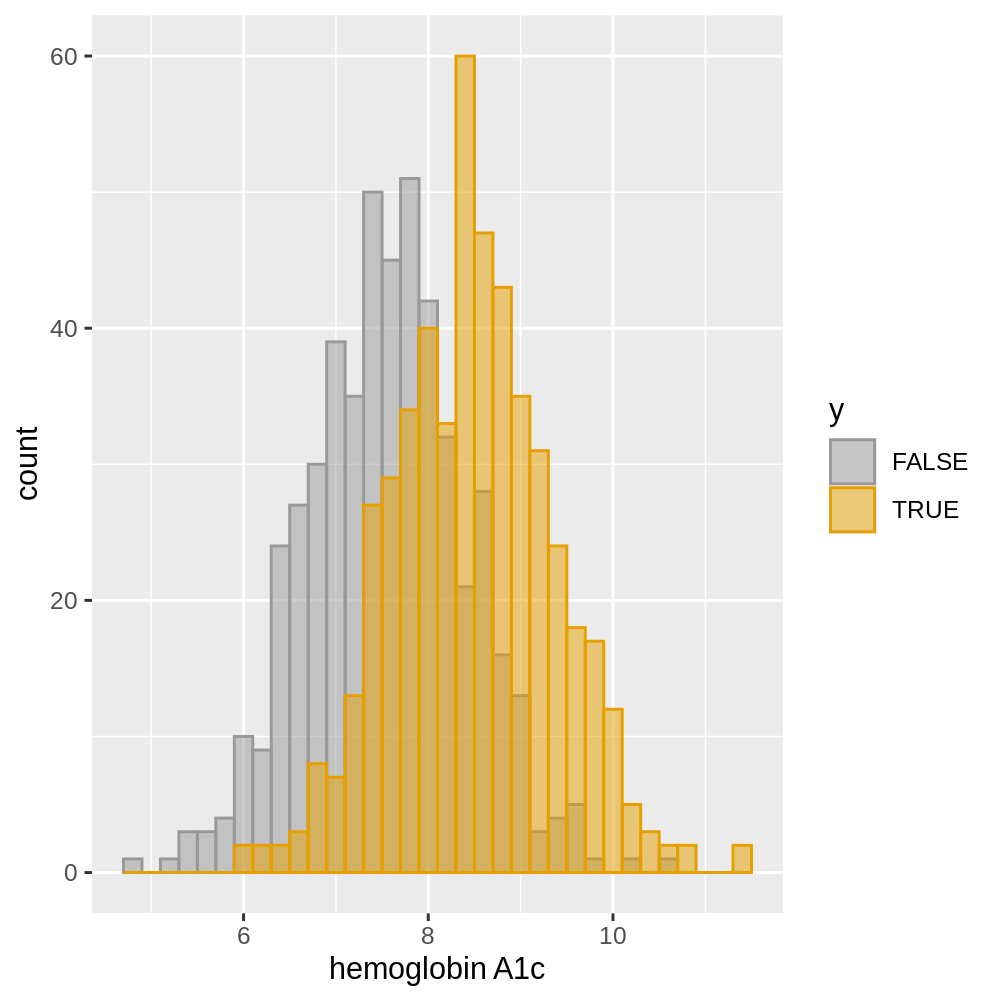

In [ ]:
ggplot(data, aes(x, fill = y, color = y)) + 
  geom_histogram(alpha = 0.5, position = 'identity',binwidth=0.2)+
  xlab('hemoglobin A1c')+
  scale_color_manual(values=cbPalette[1:2])+
  scale_fill_manual(values=cbPalette[1:2])

## Plot ROC curve and calculate AUC

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



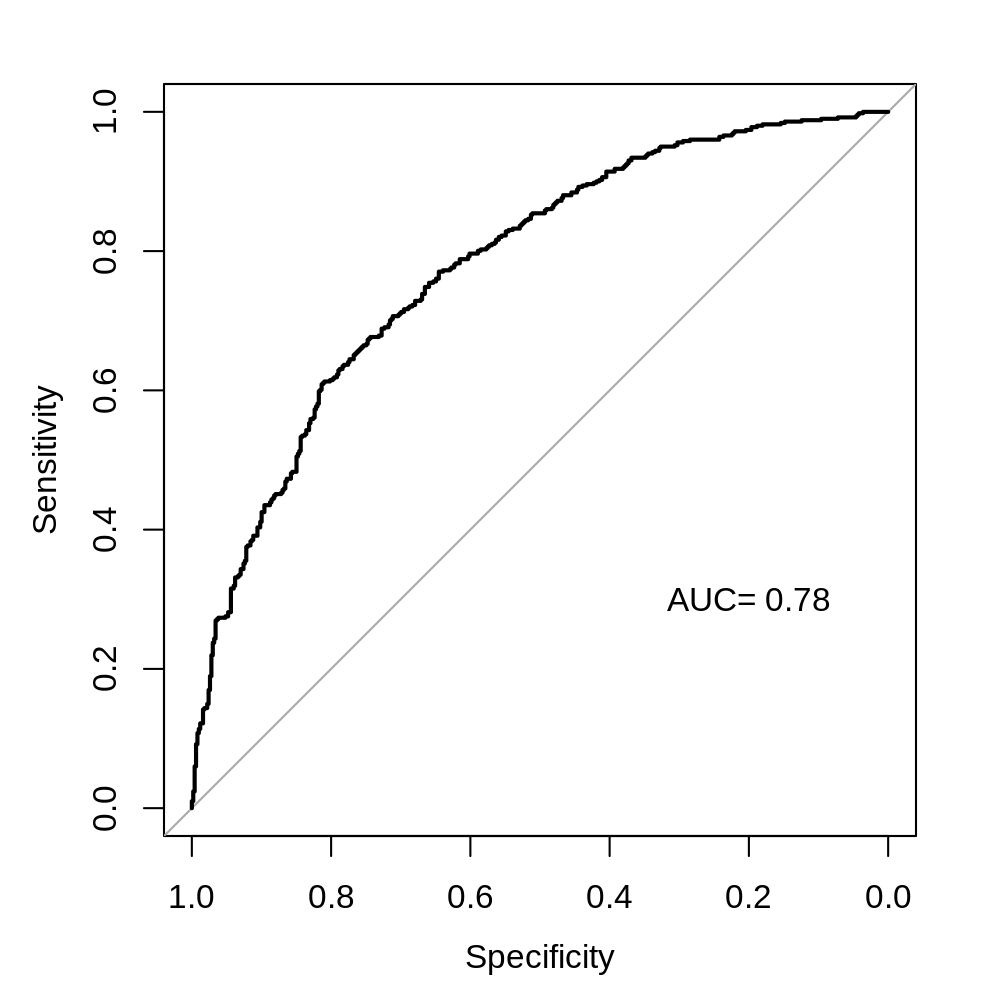

In [ ]:
roc_obj <- roc(data$y, data$x)
plot(roc_obj)
text(0.2,0.3,paste('AUC=',format(auc(roc_obj),digits=2)))

## Create a dataset with mix of diabetics and non-diabetics

In [ ]:
data <- data.frame(x=c(x1,x2), y=c(y1,y2))

## Plot distribution of biomarker values for patients with and without outcome

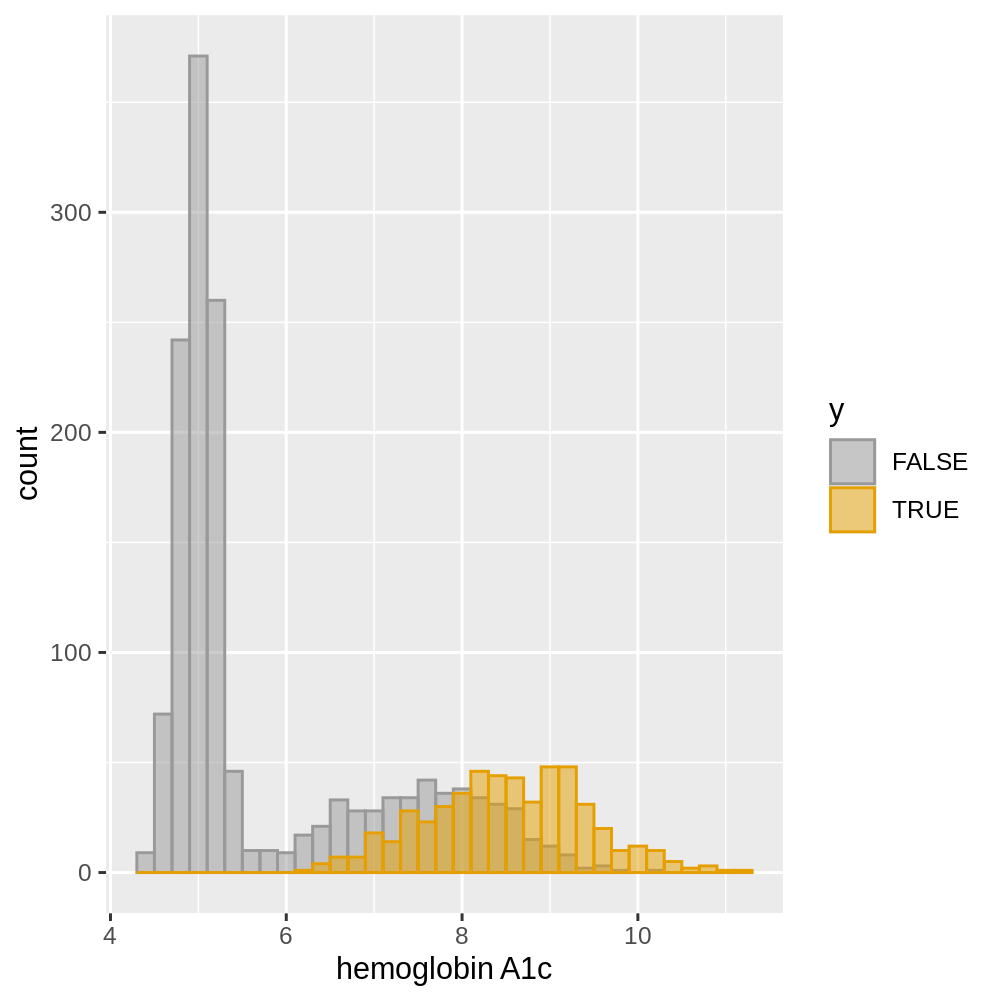

In [ ]:
ggplot(data, aes(x, fill = y, color = y)) + 
  geom_histogram(alpha = 0.5, position = 'identity',binwidth=0.2)+
  xlab('hemoglobin A1c')+
  scale_color_manual(values=cbPalette[1:2])+
  scale_fill_manual(values=cbPalette[1:2])

## Plot ROC curve and calculate AUC

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



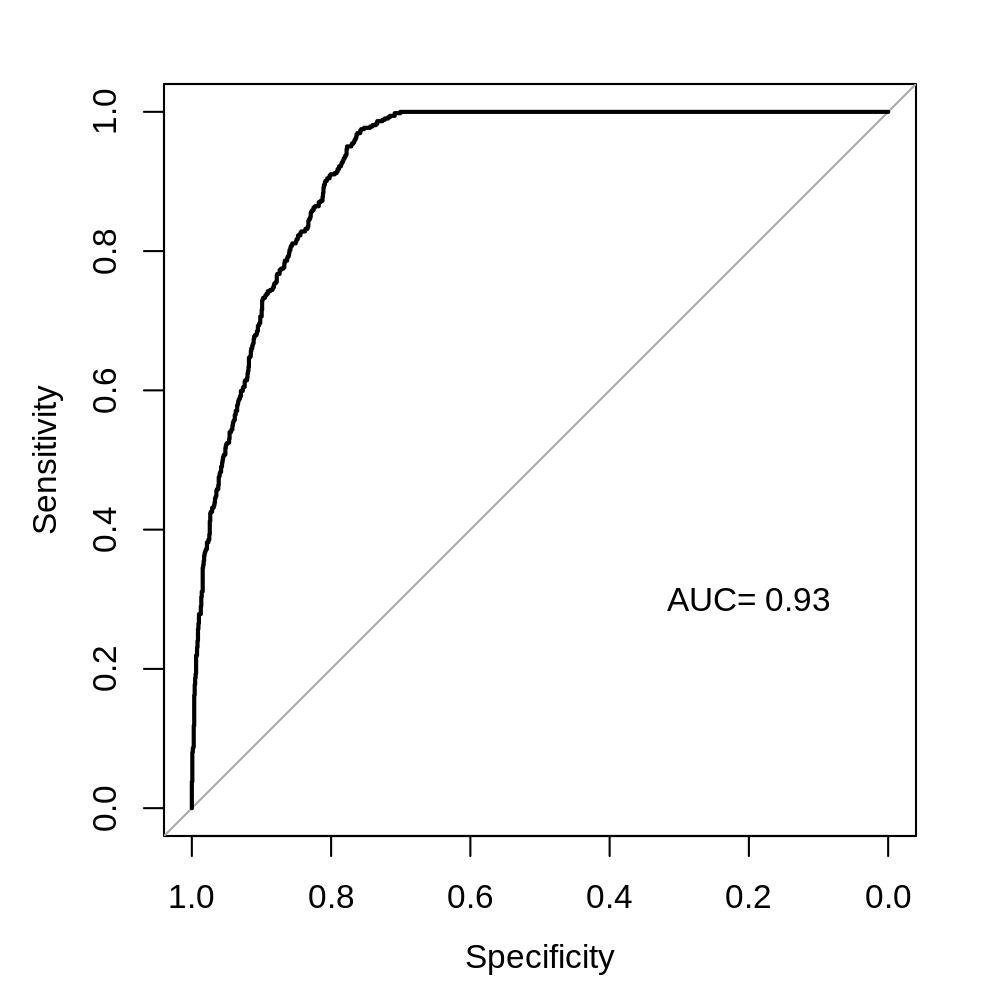

In [ ]:
roc_obj <- roc(data$y, data$x)
plot(roc_obj)
text(0.2,0.3,paste('AUC=',format(auc(roc_obj),digits=2)))